In [2]:
import pandas as pd
from google.colab import files

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
uploaded = files.upload()

Saving cars_moldova_no_dup.csv to cars_moldova_no_dup.csv


In [4]:
df = pd.read_csv('/content/cars_moldova_no_dup.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
37259,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
37260,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
37261,Renault,Modus,2009,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
37262,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


In [5]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
 Число столблцов =  5
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)'] 
 Число столблцов =  4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37264 entries, 0 to 37263
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  37264 non-null  object 
 1   Model                 37264 non-null  object 
 2   Year                  37264 non-null  int64  
 3   Style                 37264 non-null  object 
 4   Distance              37264 non-null  float64
 5   Engine_capacity(cm3)  37264 non-null  float64
 6   Fuel_type             37264 non-null  object 
 7   Transmission          37264 non-null  object 
 8   Price(euro)           37264 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.6+ MB


In [7]:
# Метод describe датафрейма позволяет получить основные статистические данные для каждого столбца (стандартное отклонение, квартили значения, минимальное и максимальное значение)
df.describe()

,Year,Distance,Engine_capacity(cm3),Price(euro)
count,37264.000000,3.726400e+04,37264.000000,3.726400e+04
mean,2007.709264,4.758488e+05,1858.932535,9.569387e+03
std,8.295806,4.591520e+06,707.662731,5.283315e+04
min,1900.000000,0.000000e+00,0.000000,1.000000e+00
25%,2004.000000,9.000000e+04,1499.000000,3.300000e+03
50%,2009.000000,1.700000e+05,1800.000000,6.490000e+03
75%,2014.000000,2.300000e+05,2000.000000,1.179900e+04
max,2021.000000,1.000000e+08,9999.000000,1.000000e+07


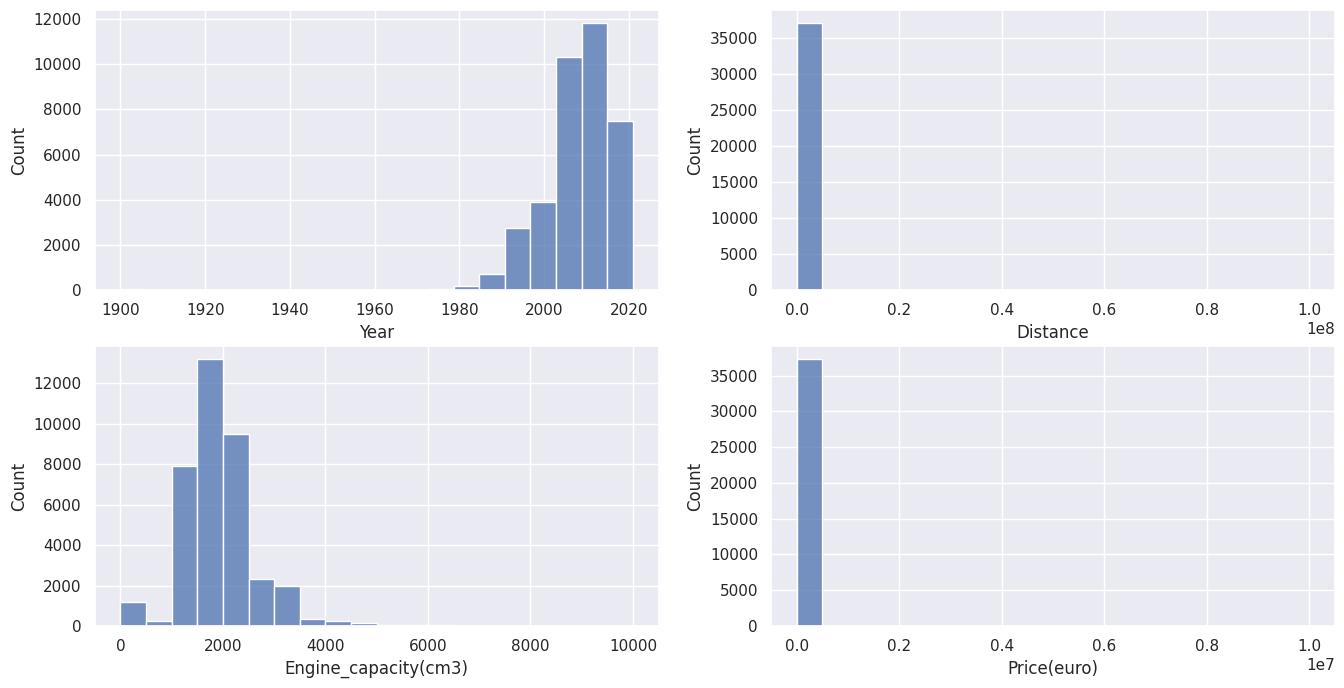

In [8]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20);

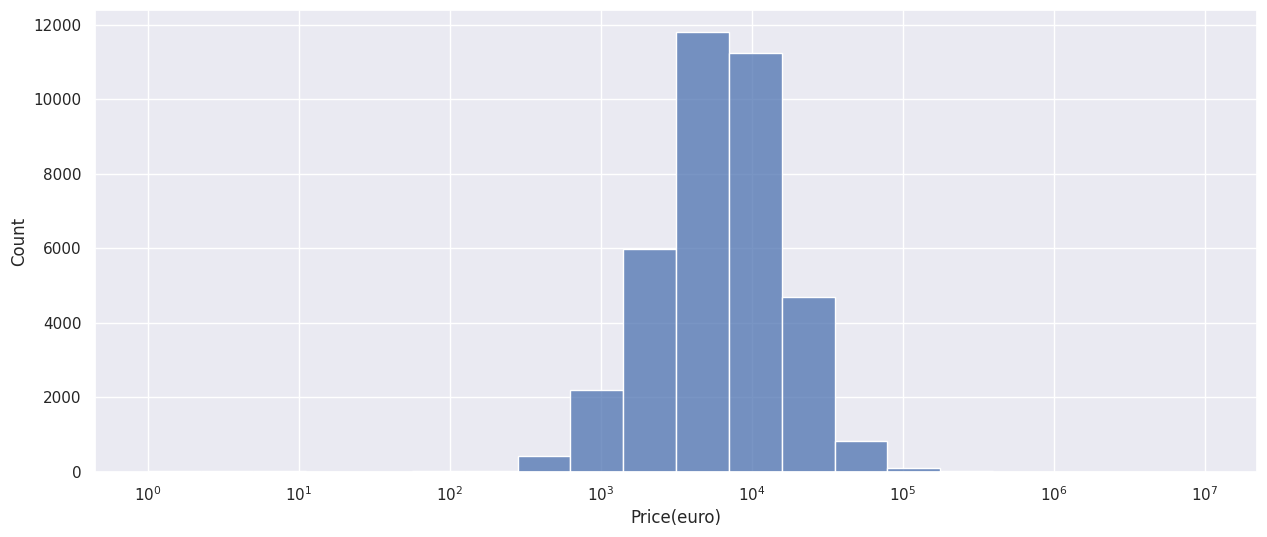

In [9]:
plt.figure(figsize=(15,6))
sns.histplot(data=df,
        x='Price(euro)', bins = 20, log_scale = True);

<Axes: xlabel='Distance', ylabel='Count'>

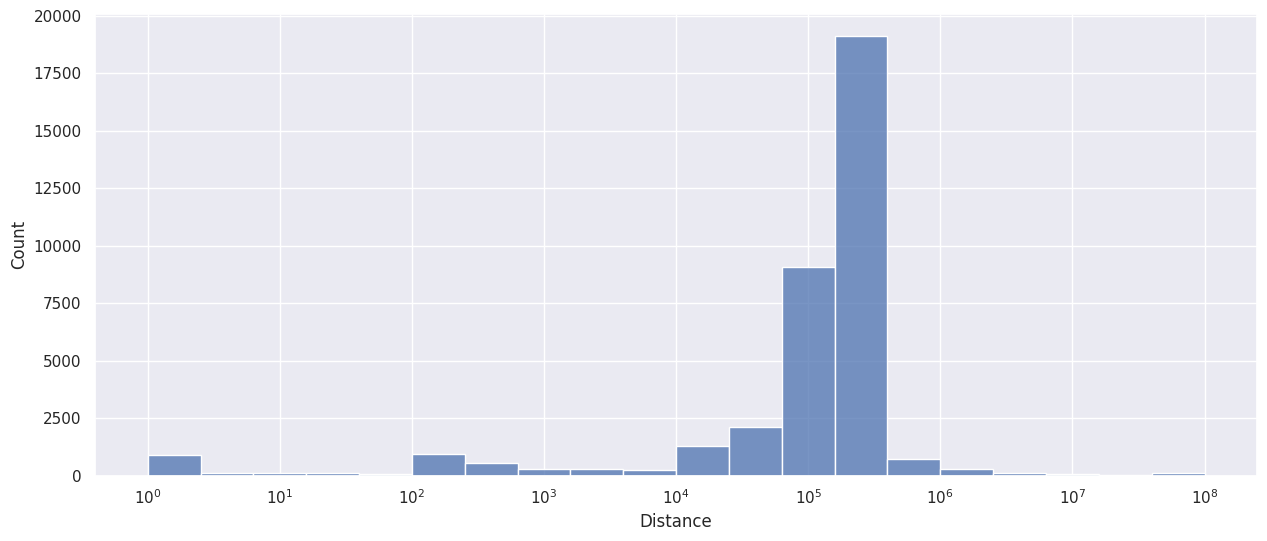

In [10]:
# Удалим те объекты у которых Расстояние равно 0
question_dist = df[df.Distance == 0]
df = df.drop(question_dist.index)

plt.figure(figsize=(15,6))
sns.histplot(data=df,
        x='Distance', bins = 20, log_scale = True)

In [11]:
count_old = df.shape[0]
# здравый смысл
question_dist = df[(df.Year <2021) & (df.Distance < 1100)]
df = df.drop(question_dist.index)

# анализ гистограмм
question_dist = df[(df.Distance > 1e6)]
df = df.drop(question_dist.index)

# здравый смысл
question_engine = df[df["Engine_capacity(cm3)"] < 200]
df = df.drop(question_engine.index)

# здравый смысл
question_engine = df[df["Engine_capacity(cm3)"] > 5000]
df = df.drop(question_engine.index)

# здравый смысл
question_price = df[(df["Price(euro)"] < 101)]
df = df.drop(question_price.index)

# анализ гистограмм
question_price = df[df["Price(euro)"] > 1e5]
df = df.drop(question_price.index)

#анализ гистограмм
question_year = df[df.Year < 1971]
df = df.drop(question_year.index)

DF = df.reset_index(drop=True)
DF.tail()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
32529,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0
32530,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
32531,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
32532,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0
32533,Renault,Grand Scenic,2006,Minivan,300000.0,1500.0,Diesel,Manual,4000.0


In [12]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32534 entries, 0 to 32533
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32534 non-null  object 
 1   Model                 32534 non-null  object 
 2   Year                  32534 non-null  int64  
 3   Style                 32534 non-null  object 
 4   Distance              32534 non-null  float64
 5   Engine_capacity(cm3)  32534 non-null  float64
 6   Fuel_type             32534 non-null  object 
 7   Transmission          32534 non-null  object 
 8   Price(euro)           32534 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.2+ MB


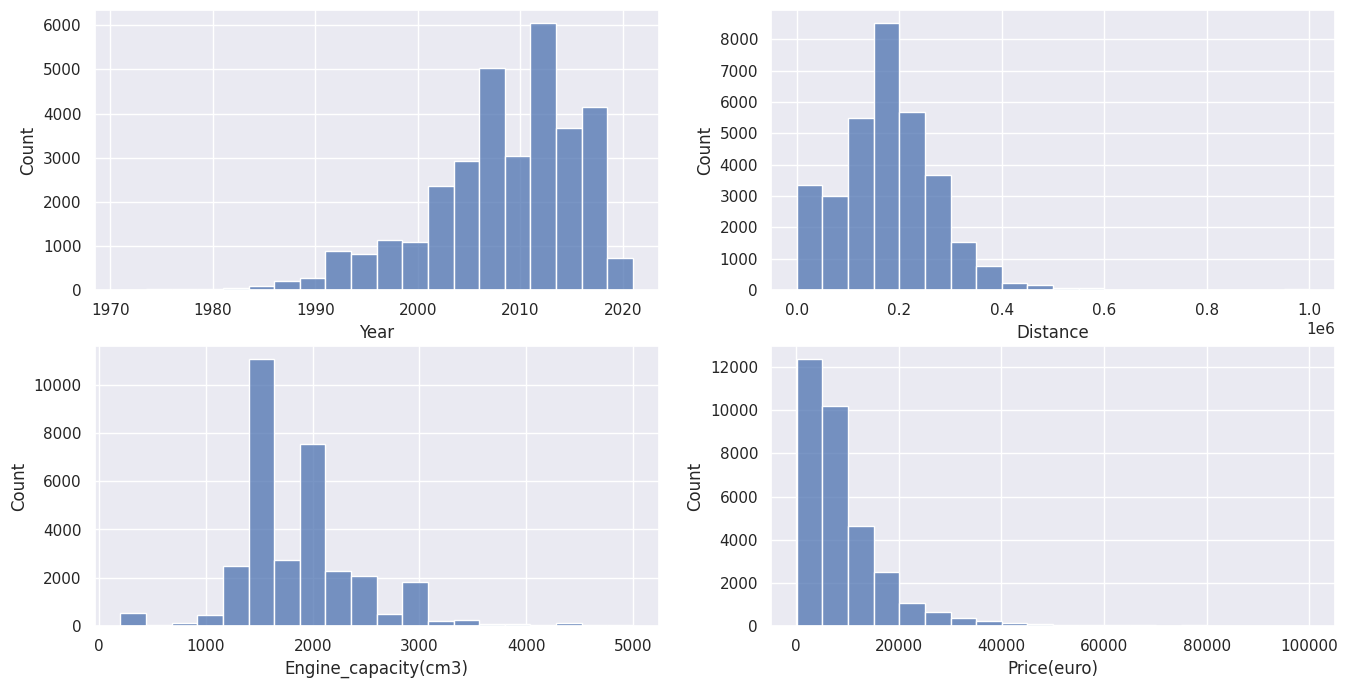

In [13]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20);

In [14]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32534 entries, 0 to 32533
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32534 non-null  object 
 1   Model                 32534 non-null  object 
 2   Year                  32534 non-null  int64  
 3   Style                 32534 non-null  object 
 4   Distance              32534 non-null  float64
 5   Engine_capacity(cm3)  32534 non-null  float64
 6   Fuel_type             32534 non-null  object 
 7   Transmission          32534 non-null  object 
 8   Price(euro)           32534 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.2+ MB


<Figure size 1500x1500 with 0 Axes>

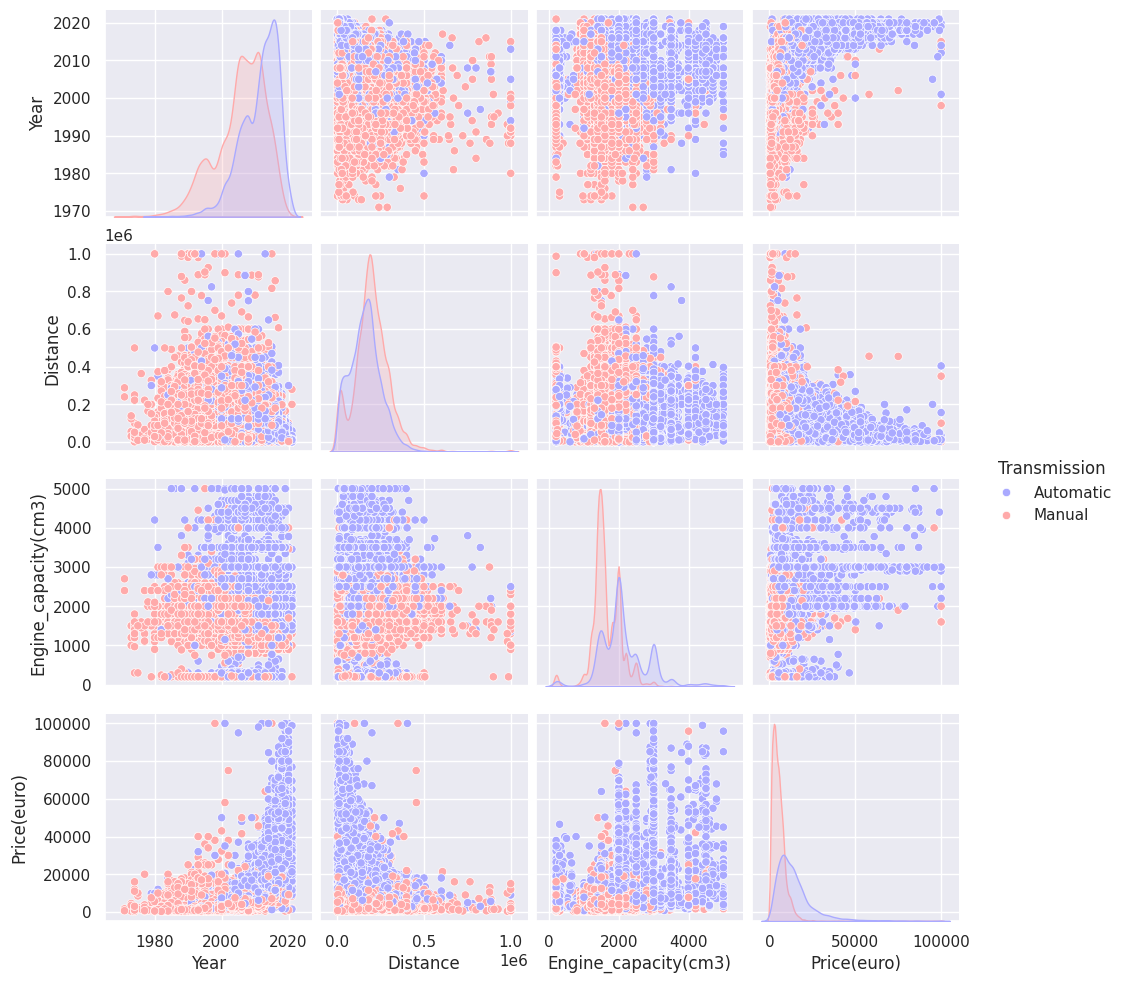

In [15]:
fig = plt.figure(figsize=(15,15))
sns.pairplot(data = df,
             hue ='Transmission',
             palette = 'bwr',);

In [16]:
cat_columns = []
num_columns = []
for column_name in DF.columns:
 if (DF[column_name].dtypes == object):
  cat_columns +=[column_name]
 else:
  num_columns +=[column_name]

In [17]:
DF[num_columns].describe()

,Year,Distance,Engine_capacity(cm3),Price(euro)
count,32534.000000,32534.000000,32534.000000,32534.000000
mean,2008.233110,181664.016598,1866.865925,9416.256224
std,7.243986,99126.563403,609.448832,9516.934622
min,1971.000000,1.000000,200.000000,200.000000
25%,2004.000000,122000.000000,1500.000000,3500.000000
50%,2009.000000,180000.000000,1800.000000,6700.000000
75%,2014.000000,236826.750000,2000.000000,12000.000000
max,2021.000000,1000000.000000,5000.000000,100000.000000


In [18]:
DF_norm  = df.copy()
Xmin = df[num_columns].min()
Xmax = df[num_columns].max()

DF_norm[num_columns] = (df[num_columns]- Xmin)/( Xmax - Xmin)

<Axes: xlabel='Distance', ylabel='Count'>

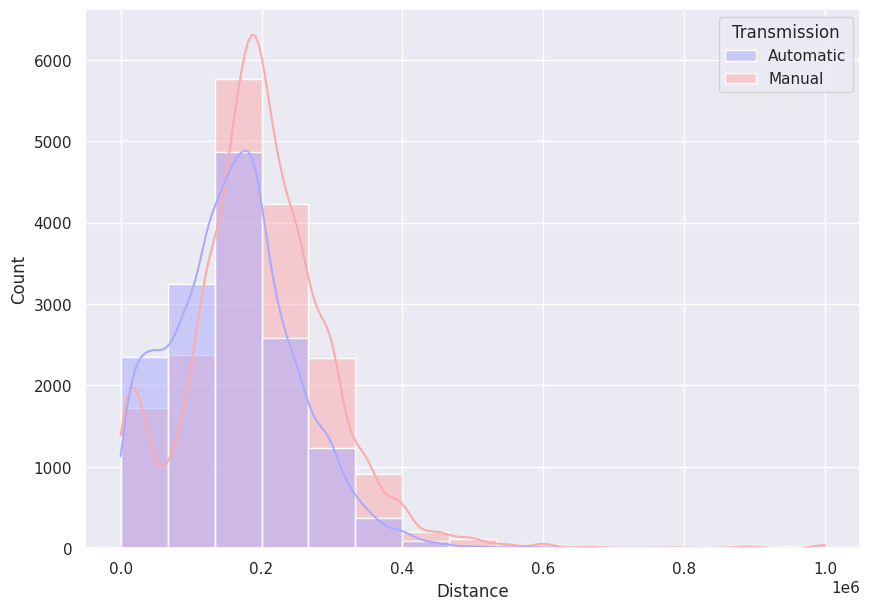

In [19]:
DF_norm  = df.copy()
Xmin = df[num_columns].min()
Xmax = df[num_columns].max()

DF_norm[num_columns] = (df[num_columns]- Xmin)/( Xmax - Xmin)
fig = plt.figure(figsize=(10,7))
sns.histplot(data = df,
             x = 'Distance',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')

<Axes: xlabel='Distance', ylabel='Count'>

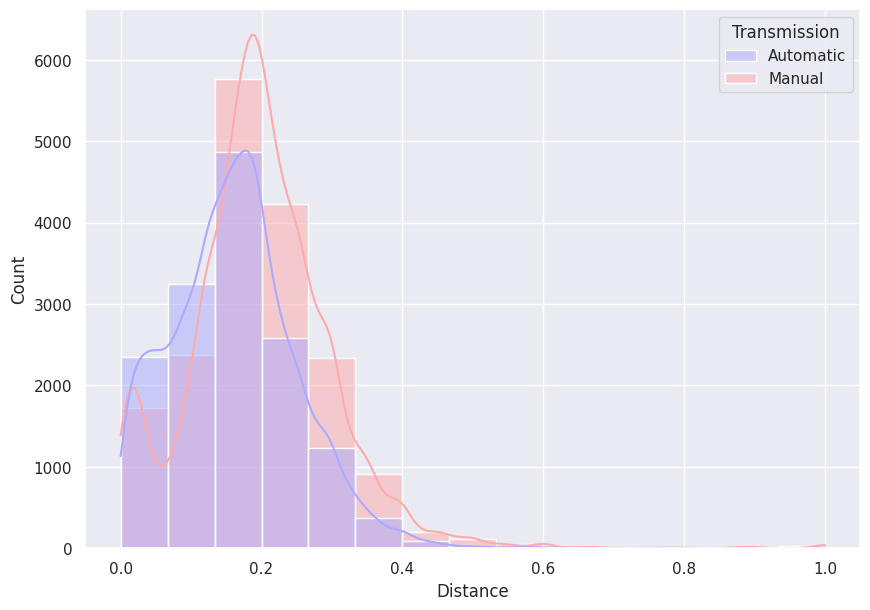

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF_norm,
             x = 'Distance',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')

In [21]:
DF_scaled = df.copy()
M = df[num_columns].mean()
STD = df[num_columns].std()
DF_scaled[num_columns] = (df[num_columns]-M)/STD

<Axes: xlabel='Distance', ylabel='Count'>

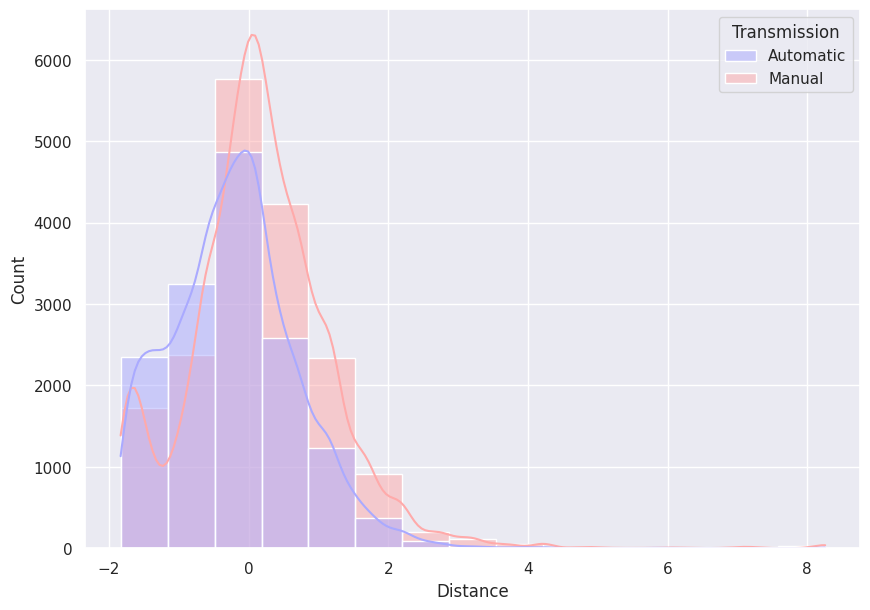

In [22]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF_scaled,
             x = 'Distance',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')

<Axes: xlabel='Price(euro)', ylabel='Count'>

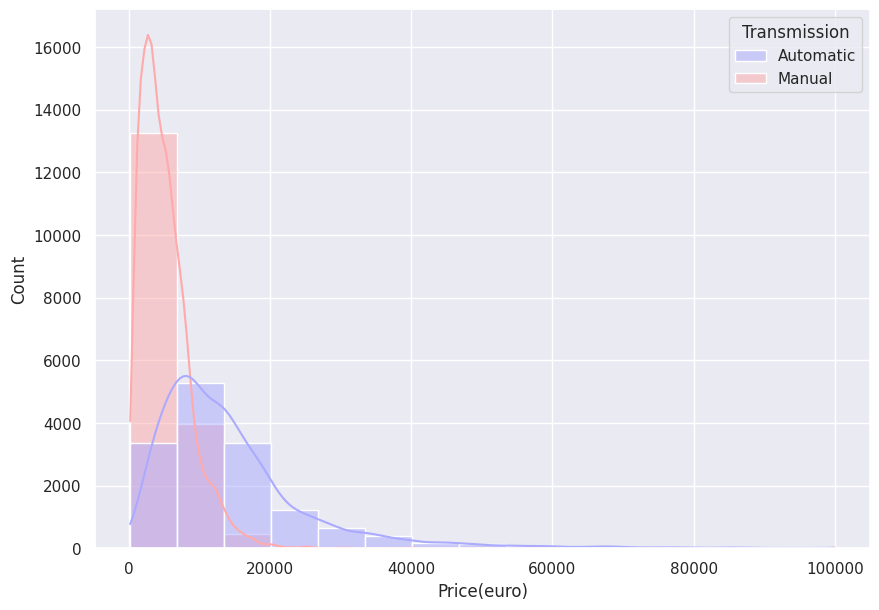

In [24]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data = df,
             x = 'Price(euro)',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')

<Axes: xlabel='Price(euro)', ylabel='Count'>

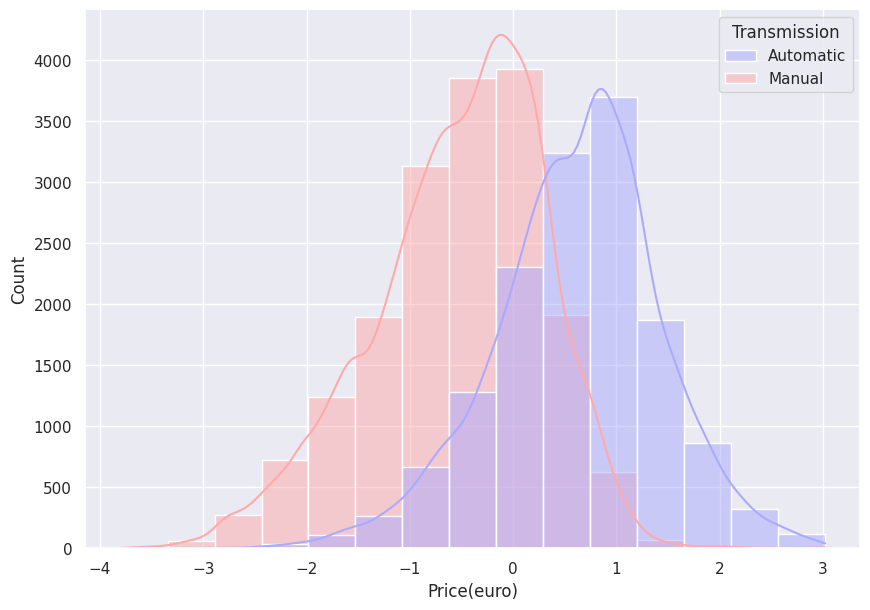

In [25]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data = DF_power,
             x = 'Price(euro)',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')

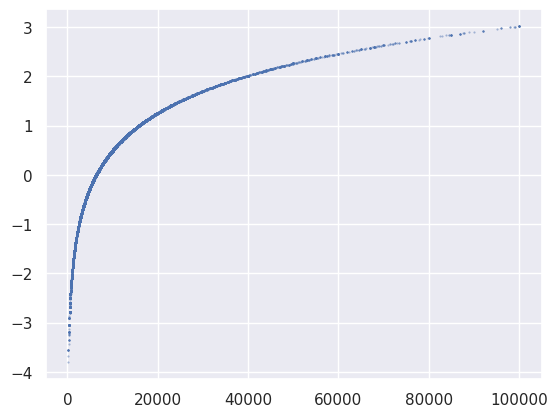

In [26]:
plt.plot(df['Price(euro)'], DF_power['Price(euro)'], '.', alpha = 0.5, markersize = 1)

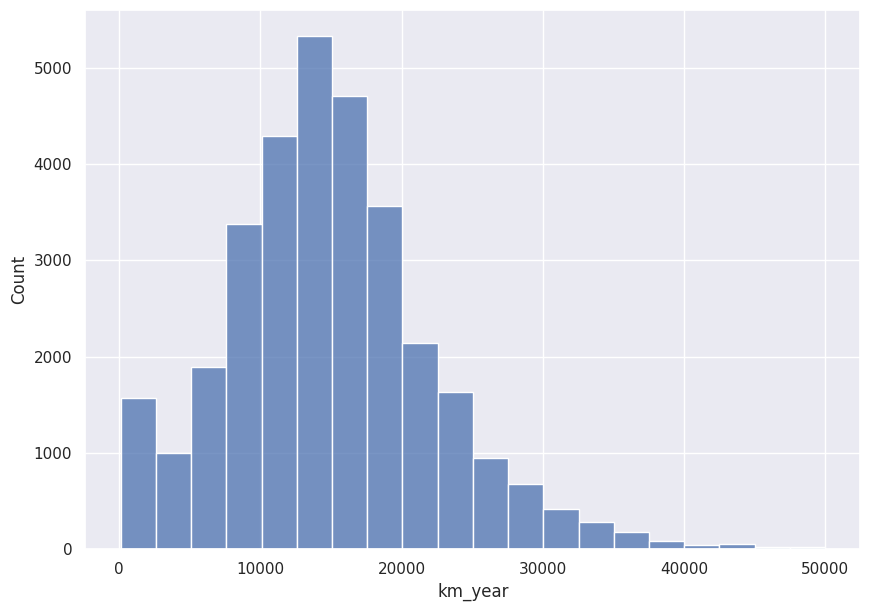

In [27]:
df['Age'] = 2022 - df.Year

df['km_year'] = df.Distance/df.Age
question_km_year = df[df.km_year > 50e3]
df = df.drop(question_km_year.index)
question_km_year = df[df.km_year < 100]
df = df.drop(question_km_year.index)
df = df.reset_index(drop=True)


plt.figure(figsize=(10,7))
sns.histplot(data=df,
            x='km_year', bins = 20);

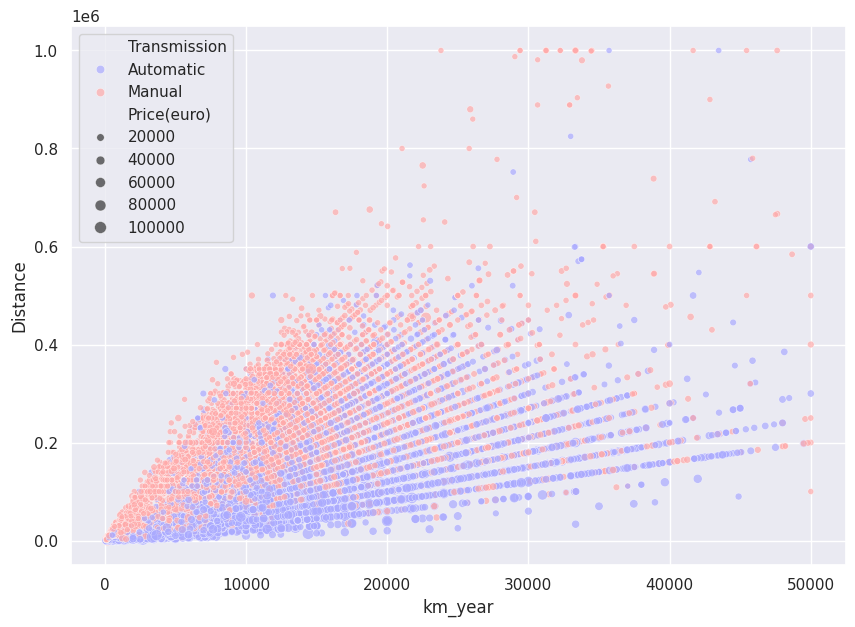

In [28]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df,
    x="km_year", y="Distance",
    hue="Transmission",
    size = "Price(euro)", alpha = 0.7,
             palette='bwr'
    );

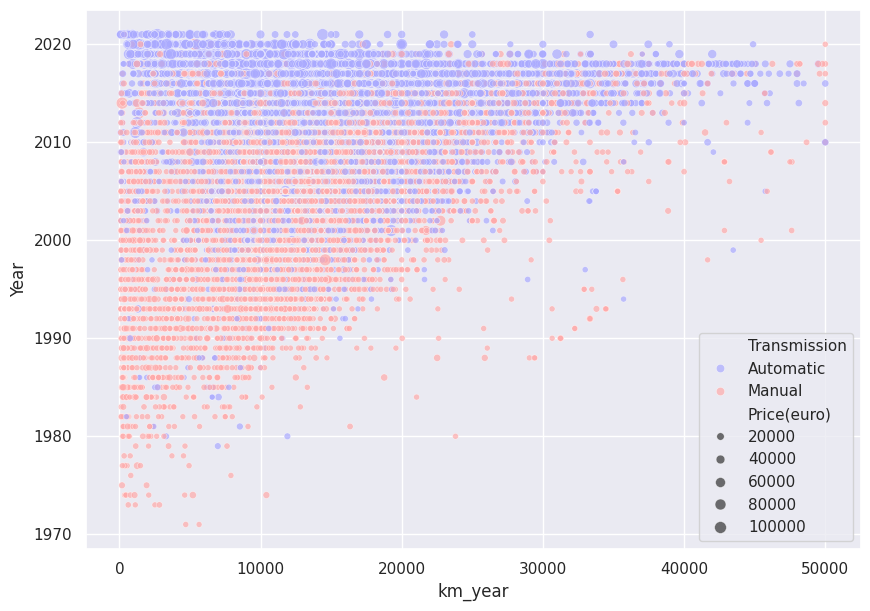

In [47]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df,
    x="km_year", y="Year",
    hue="Transmission",
    size = "Price(euro)", alpha = 0.7,
             palette='bwr'
    );

In [48]:
num_columns.append('km_year')
num_columns

['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

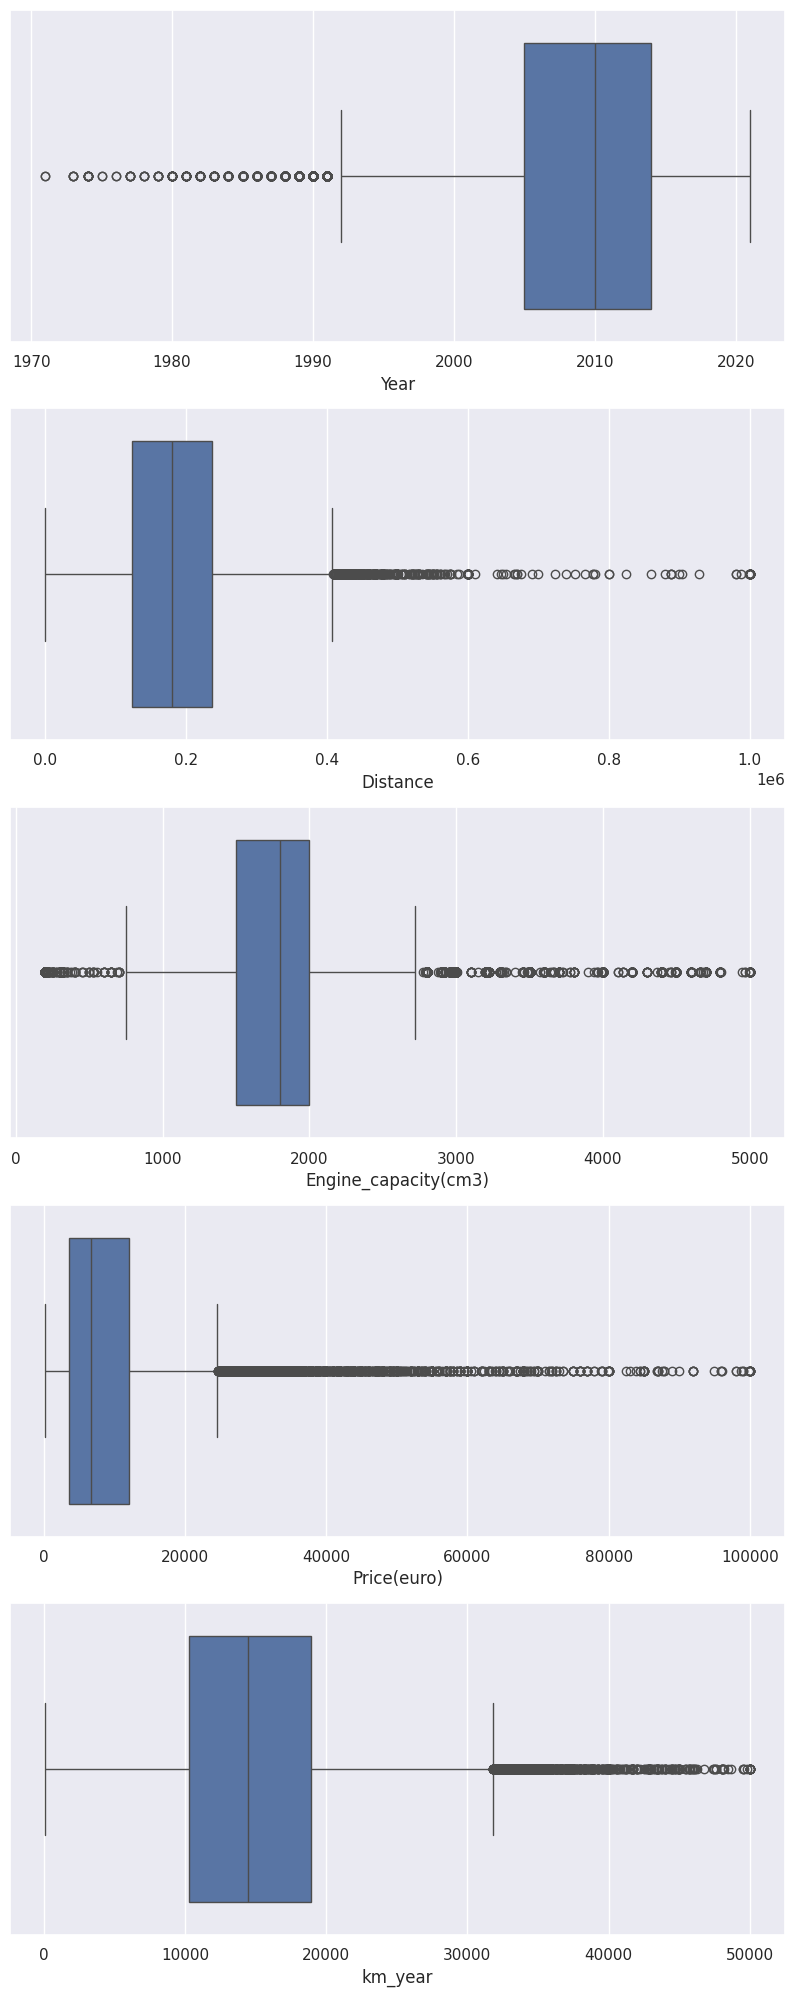

In [49]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10,25))

for idx, column_name in enumerate(num_columns):

    plt.subplot(5,1, idx+1)
    sns.boxplot(data=df,
            x=column_name);

In [52]:
cm = sns.color_palette("vlag", as_cmap=True)

df.corr(numeric_only=True).style.background_gradient(cmap=cm, vmin = -1, vmax=1)

,Year,Distance,Engine_capacity(cm3),Price(euro),Age,km_year
Year,1.000000,-0.434240,-0.025886,0.551517,-1.000000,0.425819
Distance,-0.434240,1.000000,0.067473,-0.347328,0.434240,0.462784
Engine_capacity(cm3),-0.025886,0.067473,1.000000,0.382841,0.025886,-0.010412
Price(euro),0.551517,-0.347328,0.382841,1.000000,-0.551517,0.156816
Age,-1.000000,0.434240,0.025886,-0.551517,1.000000,-0.425819
km_year,0.425819,0.462784,-0.010412,0.156816,-0.425819,1.000000


In [53]:
df[cat_columns].nunique()

,0
Make,78
Model,777
Style,12
Fuel_type,6
Transmission,2


In [54]:
counts = df.Make.value_counts()

counts

,count
Make,
Volkswagen,3423
Toyota,3083
Mercedes,3015
BMW,2594
Renault,2346
...,...
Abarth,1
Zotye,1
Tata,1


In [55]:
counts.median()

32.5

In [56]:
counts[counts<100]

,count
Make,
Rover,92
Chrysler,83
Jeep,77
Mini,72
Infiniti,67
Jaguar,64
Daewoo,63
Lincoln,49
Dodge,49


In [57]:
rare =  counts[(counts.values < 25)]
df['Make'] = df['Make'].replace(rare.index.values, 'Rare')
df.Make.value_counts()

,count
Make,
Volkswagen,3423
Toyota,3083
Mercedes,3015
BMW,2594
Renault,2346
Opel,1824
Skoda,1730
Audi,1546
Dacia,1344


In [58]:
counts = df.Model.value_counts()

counts

,count
Model,
E Class,1092
5 Series,1035
Passat,861
Megane,804
Astra,791
...,...
Odyssey,1
Blazer,1
GW Peri,1


In [59]:
counts.median()

9.0

In [60]:
counts[counts<100]

,count
Model,
Clio,97
X-Trail,93
Combo,88
Juke,88
A Class,87
...,...
Odyssey,1
Blazer,1
GW Peri,1


In [61]:
counts = df.Model.value_counts()
rare =  counts[(counts.values <  50)]
df['Model'] = df['Model'].replace(rare.index.values, 'Rare')
df.Model.value_counts()

,count
Model,
Rare,6608
E Class,1092
5 Series,1035
Passat,861
Megane,804
...,...
Urban Cruiser,52
GLC,52
Accent,51


In [62]:
df.to_csv('/content/cars_moldova_clean.csv',index=False)

In [63]:
df['Transmission'] = df['Transmission'].map({'Automatic': 1, 'Manual': 0})

In [64]:
df_se = df.copy()
df_se[cat_columns] = df_se[cat_columns].astype('category')

for _, column_name in enumerate(cat_columns):
    df_se[column_name] =  df_se[column_name].cat.codes
df_se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  int8   
 1   Model                 32220 non-null  int16  
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  int8   
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  int8   
 7   Transmission          32220 non-null  int8   
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  float64
dtypes: float64(4), int16(1), int64(2), int8(4)
memory usage: 1.7 MB


In [65]:
df_se.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,40,92,2011,4,195000.0,1800.0,2,1,7750.0,11,17727.272727
1,32,62,2014,11,135000.0,1500.0,0,0,8550.0,8,16875.000000
2,32,71,2012,11,110000.0,1500.0,0,0,6550.0,10,11000.000000
3,28,23,2006,11,200000.0,1600.0,3,0,4100.0,16,12500.000000
4,23,126,2000,5,300000.0,2200.0,0,0,3490.0,22,13636.363636


In [66]:
sns.pairplot(data = df_se, hue ='Transmission');

Output hidden; open in https://colab.research.google.com to view.

In [67]:
df_ohe = df.copy()
df_ohe = pd.get_dummies(df_ohe)
df_ohe.tail()

,Year,Distance,Engine_capacity(cm3),Transmission,Price(euro),Age,km_year,Make_Alfa Romeo,Make_Audi,Make_BMW,...,Style_Roadster,Style_SUV,Style_Sedan,Style_Universal,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid
32215,2016,88000.0,1800.0,1,11500.0,6,14666.666667,False,False,False,...,False,False,True,False,False,False,False,False,True,False
32216,2002,225000.0,1800.0,0,4400.0,20,11250.000000,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32217,2015,89000.0,1500.0,0,7000.0,7,12714.285714,False,False,False,...,False,False,False,True,True,False,False,False,False,False
32218,2006,370000.0,2000.0,0,4000.0,16,23125.000000,False,False,False,...,False,False,False,False,True,False,False,False,False,False
32219,2006,300000.0,1500.0,0,4000.0,16,18750.000000,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [68]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Columns: 205 entries, Year to Fuel_type_Plug-in Hybrid
dtypes: bool(198), float64(4), int64(3)
memory usage: 7.8 MB


In [69]:
df_se.to_csv('/content/cars_moldova_cat_num.csv',index=False)
df_ohe.to_csv('/content/cars_moldova_onehot.csv',index=False)

# Контрольные вопросы

1. Допустим, у вас есть файл с данными, который называется ‘iris.
 csv’. Этот файл находится в папке ‘/data/’. Вы открываете его
 в текстовом редакторе и видите следующие первые строки:
sepal length in cm; sepal width in cm; petal length in
cm; petal width in cm; class
 5.1; 3.5; 1.4; 0.2; 0

 Как должна выглядеть команда для считывания данных в датафрейм Pandas?

 df = pandas.read_csv(delimiter=';')

 2. Для набора данных Cars после удаления дубликатов выберите
из полного датафрейма строки с индекса 69 по 322. Отсортируйте полученный датафрейм по колонке ‘Distance’ по убыванию. Какое значение колонки ‘Style’ у полученного датафрейма во второй строке сверху?

In [42]:
df_q = df.loc[69:322, :]
df_q.sort_values(by='Distance', ascending=False)
df_q.iloc[1, 3]

'Universal'

3. Для набора данных Cars оцените количество строк, которые
были удалены после анализа гистограмм распределения и удаления аномальных значений.

In [43]:
count_diff = count_old - count_new
print(count_diff)

4154


4. Для набора данных Cars назовите самую распространенную
марку автомобилей (столбец Make).

In [44]:
DF['Make'].value_counts()

,count
Make,
Volkswagen,3426
Toyota,3075
Mercedes,3021
BMW,2594
Renault,2369
Opel,1856
Skoda,1734
Audi,1548
Ford,1351


In [45]:
DF['Make'].value_counts().index[0]

'Volkswagen'

5. Визуализируйте скаттерограмму для двух столбцов — Distance
и Year — набора данных Cars с использованием столбца
Transmission в качестве цвета маркера (hue). К какому типу
Transmission относится точка, которая наиболее близка к координатам (Year = 1980, Distance = 500 000)?

<Axes: xlabel='Year', ylabel='Distance'>

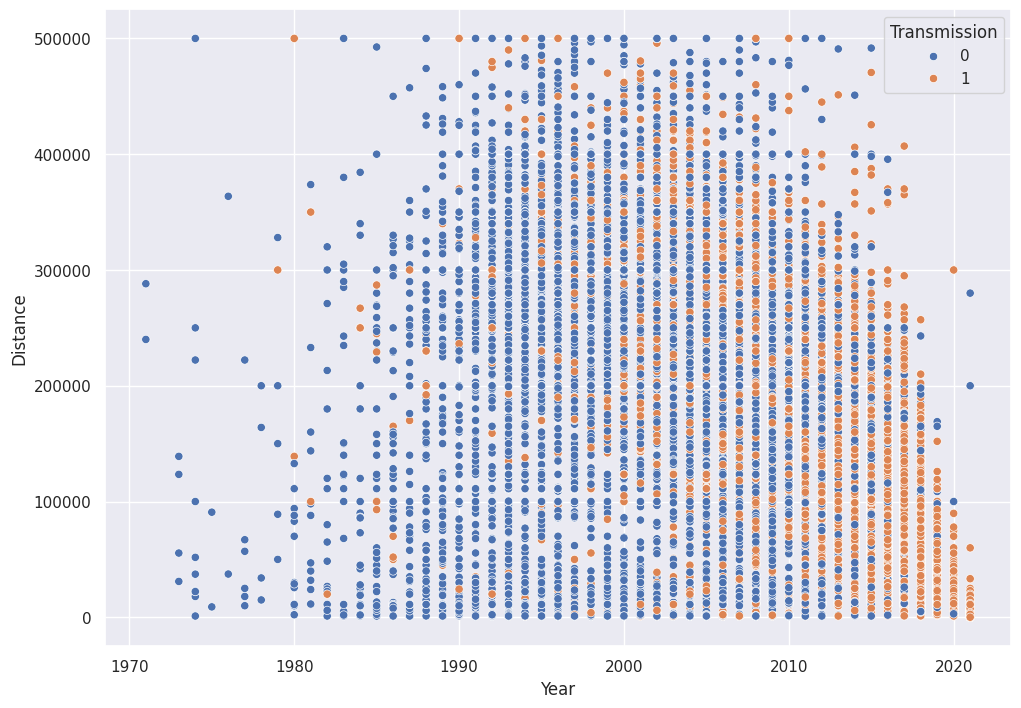

In [46]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(DF, x='Year',y='Distance', hue='Transmission')

Указанная точка ближе всего к типу Transmission - Manual.

6. Представим, что вы визуализировали некий набор данных. Какие новые признаки, основанные на имеющихся, необходимо сконструировать, чтобы иметь возможность отделить все
красные точки от всех синих точек с помощью прямой линии?